# **Colab Environment Setup**

In [ ]:
import kagglehub

# Importing our Google News Data
google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


Using Colab cache for faster access to the 'google-news-vectors' dataset.
Data source import complete.


In [ ]:
google_news_vectors_path

'/kaggle/input/google-news-vectors'

In [ ]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

fatal: destination path 'DM2025-Lab2-Exercise' already exists and is not an empty directory.


In [ ]:
# Installing all of our dependencies
# The lab in colab was tested with this, and everything should work as intended
# If in your case something is not working please notify the TAs
!pip3 install python-dotenv==1.1.1 gensim==4.3.3 tensorflow==2.20.0 tensorflow-hub==0.16.1 keras==3.11.3 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2

In [ ]:
# test code for environment setup
# import library
import dotenv
import gensim
import tensorflow
import tensorflow_hub
import keras
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.20.0
keras: 3.11.3


##### **OPTIONAL: If you want to save your outputs you can send them to your own drive by mounting the drive in the following way (uncomment the lines):**

In [ ]:

# Remember to change the directory of your outputs to your folder in the new mounted google drive inside colab
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


,word,count
0,just,301
1,like,243
2,don,207
3,people,120
4,time,118
5,day,114
6,know,112
7,good,111
8,love,111
9,watch,98


,word,count
0,just,29
1,like,24
2,don,22
3,people,15
4,day,14
5,love,13
6,want,12
7,make,12
8,think,11
9,awful,10


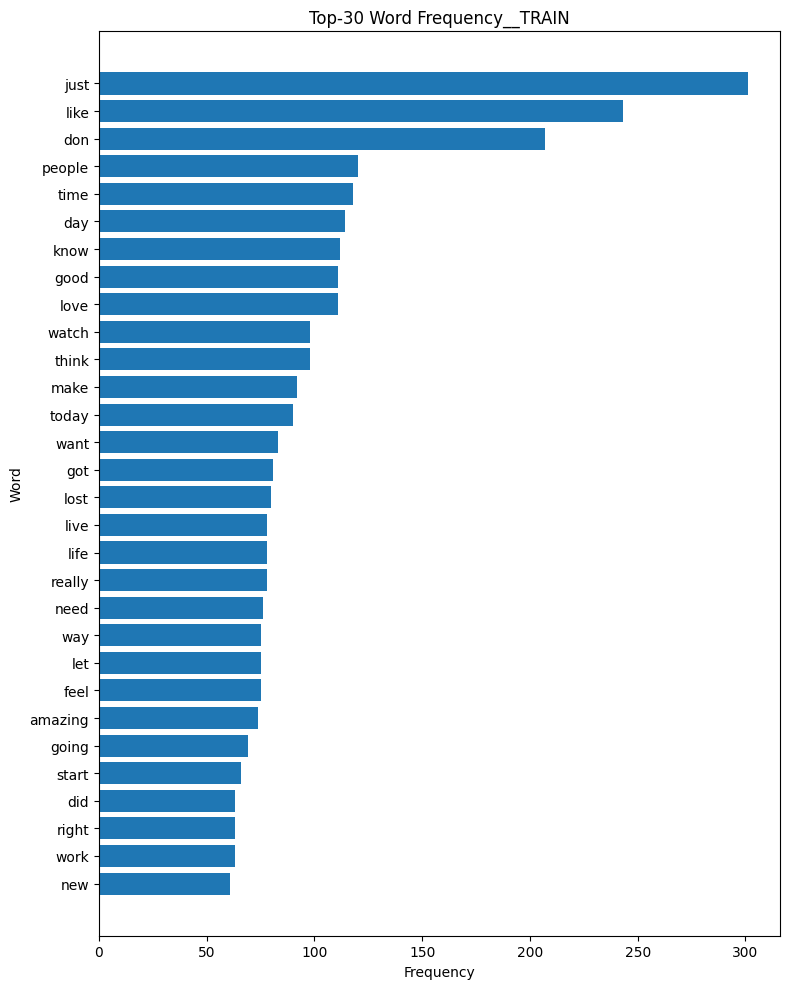

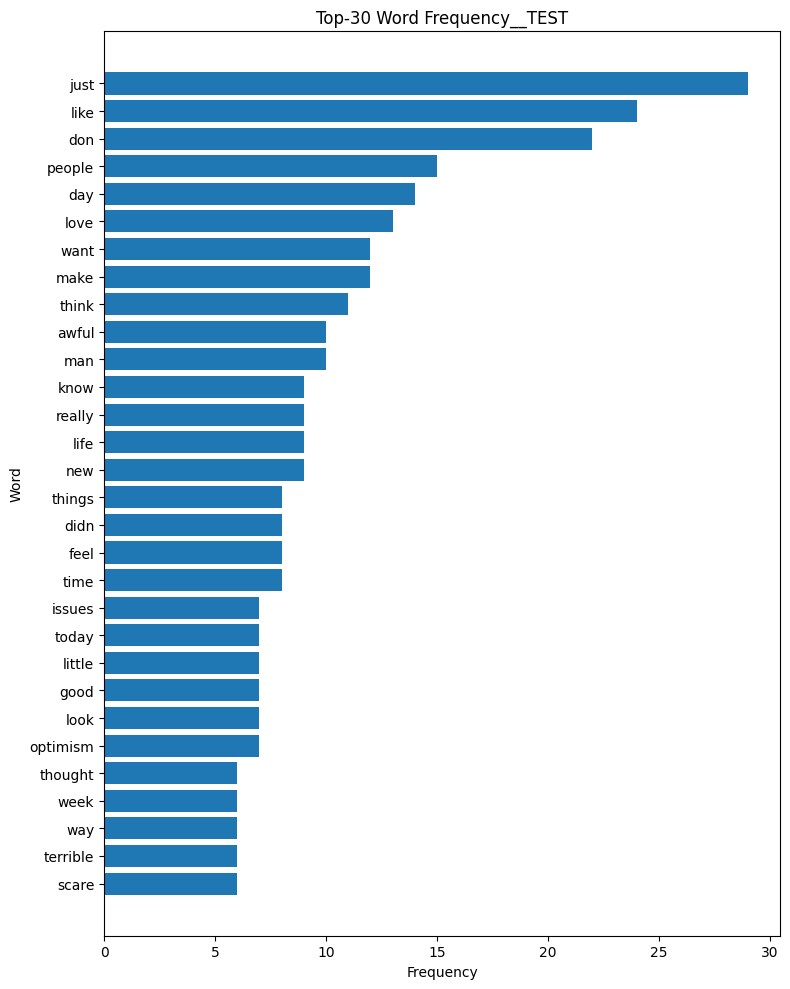

In [ ]:
# Ex1: Top-30 word frequency (train & test)
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import matplotlib.pyplot as plt

# (1) 停用詞設定（英語 + Twitter 雜訊 + 情緒字[可自由選擇]）
# 轉成 list 以符合 sklearn 參數規範
extra_stops = {
    'rt','via','http','https','co','amp','im','ive','dont','cant','wont',
    'u','ur','ya','yall','lol','omg'
}
extra_stops |= {'anger','angry','fear','joy','sad','sadness','happy','happiness'}
# 轉成 list
stopwords_all = list(ENGLISH_STOP_WORDS.union(extra_stops))

# (2) 用訓練集 fit 詞彙過濾雜訊
vectorizer = CountVectorizer(
    lowercase=True,
    token_pattern=r"(?u)\b[a-zA-Z]{3,}\b",   # 至少3個英文字母
    stop_words=stopwords_all
)

vectorizer.fit(train_df['text'].astype(str).values)
X_train = vectorizer.transform(train_df['text'].astype(str).values)
X_test  = vectorizer.transform(test_df['text'].astype(str).values)

# (3) 計算詞頻 & 取 Top-30
vocab = vectorizer.get_feature_names_out()
train_freq = np.asarray(X_train.sum(axis=0)).ravel()
test_freq  = np.asarray(X_test.sum(axis=0)).ravel()

train_top_idx = train_freq.argsort()[::-1][:30]
test_top_idx  = test_freq.argsort()[::-1][:30]

train_top = pd.DataFrame({'word': vocab[train_top_idx], 'count': train_freq[train_top_idx].astype(int)})
test_top  = pd.DataFrame({'word': vocab[test_top_idx],  'count': test_freq[test_top_idx].astype(int)})

display(train_top); display(test_top)

# (4) 視覺化
plt.figure(figsize=(8,10))
plt.barh(train_top['word'][::-1], train_top['count'][::-1])
plt.title('Top-30 Word Frequency__TRAIN'); plt.xlabel('Frequency'); plt.ylabel('Word')
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,10))
plt.barh(test_top['word'][::-1], test_top['count'][::-1])
plt.title('Top-30 Word Frequency__TEST'); plt.xlabel('Frequency'); plt.ylabel('Word')
plt.tight_layout(); plt.show()


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.  
我們會把資料存成 Pickle 格式。pickle 模組提供用於序列化與反序列化 Python 物件結構的二進位協定。
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   
* 由於會保存屬性的型別資訊，跨平台使用時更方便。
* 當資料很大時，通常能佔用更少的儲存空間，載入時間也更短。

In [ ]:
# save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

In [ ]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


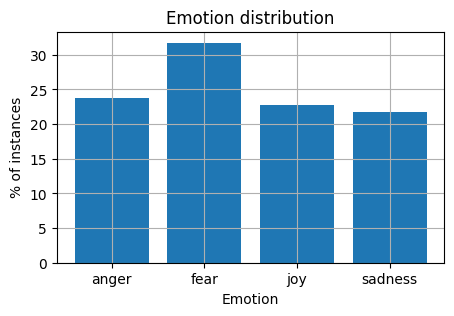

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [ ]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [ ]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [ ]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

維度詛咒（我們現在有 10,115 維）


重要特徵被忽略（例如，把表情符號納入特徵的模型，表現常會比沒用表情符號的模型更好）



In [ ]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [ ]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [ ]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [ ]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
# Ex2: TF-IDF (1000 features) + show feature names[100:110]
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',          # 英文停用詞
    token_pattern=r"(?u)\b[a-zA-Z]{3,}\b", # 至少3個英文字母，過濾數字/符號
    max_features=1000,           # 指定 1000
    sublinear_tf=True
)

# 以訓練集 fit 詞彙/IDF；再轉換成 train/test
vectorizer.fit(train_df['text'].astype(str).values)
X_train_tfidf = vectorizer.transform(train_df['text'].astype(str).values)
X_test_tfidf  = vectorizer.transform(test_df['text'].astype(str).values)

print('TF-IDF shapes:', X_train_tfidf.shape, X_test_tfidf.shape)

# 顯示 feature names[100:110]
feat_names = vectorizer.get_feature_names_out()
print('\n feature[100:110]:', feat_names[100:110])


TF-IDF shapes: (3613, 1000) (347, 1000)

 feature[100:110]: ['breakfast' 'breezy' 'bright' 'bring' 'british' 'bro' 'broadcast' 'broke'
 'broken' 'brother']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'fear', 'anger', 'sadness', 'fear', 'joy', 'fear', 'fear',
       'anger', 'joy'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

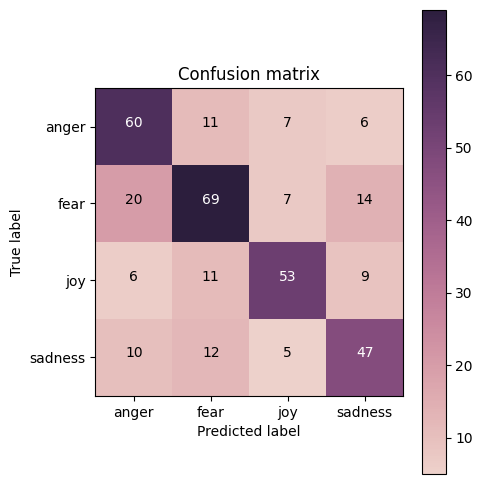

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
# Ex3: 解釋混淆矩陣結果
"""
(一) 目前結果(BOW_500 + DecisionTree)：
    i. Training accuracy = 0.99、Testing accuracy = 0.68，明顯 overfitting (訓練分數幾乎滿分)。
    ii. 混淆矩陣 (test)(圖上的數字)：
      1. anger，anger=57、誤認 fear=18
      2. fear，fear=76、誤認 anger=16
      3. joy，joy=56、誤認 fear=9 / sadness=8
      4. sadness，sadness=47、誤認 fear=13
(二) 解讀重點
    (1) 過擬合：樹太自由(可能未限制深度/leaf 大小)，進而把訓練集記住；反而到了測試集表現下降。
    (2) 上述結果常見混淆：
      -> anger ↔ fear 互相錯認最嚴重(18 與 16)，代表兩類在文字上存在有大量詞彙重疊 (或許憤怒與恐懼都常伴隨一些強烈情緒詞/咒罵/負向語氣等等)。
      -> joy ↔ sadness 也有一定混淆機率(8 與 7)，可能在帶有諷刺或雙關的句子時會更難分辨。
"""

'\n(一) 目前結果(BOW_500 + DecisionTree)：\n    i. Training accuracy = 0.99、Testing accuracy = 0.68，明顯 overfitting (訓練分數幾乎滿分)。\n    ii. 混淆矩陣 (test)(圖上的數字)：\n      1. anger，anger=57、誤認 fear=18\n      2. fear，fear=76、誤認 anger=16\n      3. joy，joy=56、誤認 fear=9 / sadness=8\n      4. sadness，sadness=47、誤認 fear=13\n(二) 解讀重點\n    (1) 過擬合：樹太自由(可能未限制深度/leaf 大小)，進而把訓練集記住；反而到了測試集表現下降。\n    (2) 上述結果常見混淆：\n      -> anger ↔ fear 互相錯認最嚴重(18 與 16)，代表兩類在文字上存在有大量詞彙重疊 (或許憤怒與恐懼都常伴隨一些強烈情緒詞/咒罵/負向語氣等等)。\n      -> joy ↔ sadness 也有一定混淆機率(8 與 7)，可能在帶有諷刺或雙關的句子時會更難分辨。\n'

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

NB training accuracy: 0.79
NB testing  accuracy: 0.71

=== Classification Report (Test) ===
              precision    recall  f1-score   support

       anger       0.65      0.67      0.66        84
        fear       0.74      0.81      0.77       110
         joy       0.77      0.70      0.73        79
     sadness       0.66      0.62      0.64        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



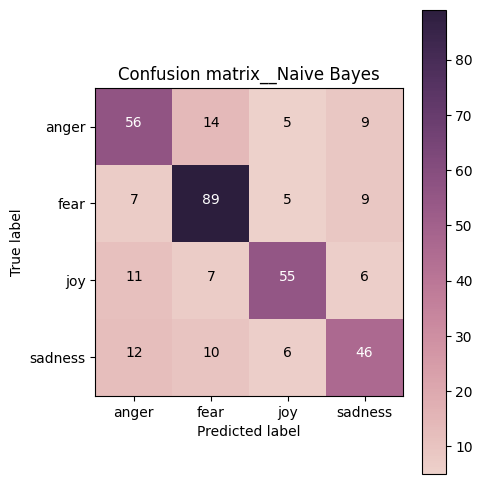

In [ ]:
# Answer here
# Ex4: Multinomial Naive Bayes on BOW_500 + confusion matrix
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# (1) 建模與訓練
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train, y_train)

# (2) 預測
y_train_pred = nb.predict(X_train)
y_test_pred  = nb.predict(X_test)

# (3) 評估
acc_train = accuracy_score(y_train, y_train_pred)
acc_test  = accuracy_score(y_test, y_test_pred)
print(f"NB training accuracy: {acc_train:.2f}")
print(f"NB testing  accuracy: {acc_test:.2f}\n")

print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=2))

# (4) 使用混淆矩陣
cm = confusion_matrix(y_test, y_test_pred, labels=['anger','fear','joy','sadness'])
labels = ['anger','fear','joy','sadness']

try:
    plot_confusion_matrix(cm, classes=labels, title='Confusion matrix__Naive Bayes')
except NameError:
    # b) 否則用 seaborn heatmap 替代
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuRd',
                xticklabels=labels, yticklabels=labels,
                cbar=True)
    plt.title('Confusion matrix — Naive Bayes')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
# EX5: Compare Naive Bayes vs. Decision Tree
"""
(一) Overall scores
  - DT: train 0.99, test 0.68，有明顯的 overfitting。
  - NB: train 0.79, test 0.70，表示泛化較好，而且小幅勝過 DT 的測試表現。

(二) Confusion matrix 重點
  1. anger & fear 的互相混淆：
    - DT：anger、fear 18；fear、anger 16
    - NB：anger、fear 15；fear、anger 9
    -> NB 顯著降低 fear 和 anger 的誤認表現，anger、fear 也略降。
  2. joy 類別：
    - DT：正確 56，NB：正確 56。
    - NB 把 joy & fear 的誤認從 9 降到 6。
  3. sadness 類別：
    - DT：正確 47，NB：正確 46。
    - NB 把 sadness & fear 從 13 降到 10，但 sadness & anger 從 7 升到 12。
--> 結論：NB 整體錯誤更平均、對 anger/fear 的分界更穩；DT 容易在訓練集記住稀疏高維的雜訊而過擬合。

(三) 為什麼？
  1. Decision Tree：
  A：以軸對齊方法以切割特徵空間，在高維稀疏 (BOW/TF-IDF) 下容易形成複雜樹 --> 高方差、過擬合；除非進行嚴格的剪枝或設定(比如：max_depth/min_samples_leaf。

  2. Multinomial Naive Bayes
  A：假設條件獨立且建模的詞頻/TF-IDF 為多項分佈，非常適配稀疏且高維的文章內容；拉普拉斯平滑可以讓罕見詞不至於把機率推到 0，優點：低方差、好泛化。

"""


'\n(一) Overall scores\n  - DT: train 0.99, test 0.68，有明顯的 overfitting。\n  - NB: train 0.79, test 0.70，表示泛化較好，而且小幅勝過 DT 的測試表現。\n\n(二) Confusion matrix 重點\n  1. anger & fear 的互相混淆：\n    - DT：anger、fear 18；fear、anger 16\n    - NB：anger、fear 15；fear、anger 9\n    -> NB 顯著降低 fear 和 anger 的誤認表現，anger、fear 也略降。\n  2. joy 類別：\n    - DT：正確 56，NB：正確 56。\n    - NB 把 joy & fear 的誤認從 9 降到 6。\n  3. sadness 類別：\n    - DT：正確 47，NB：正確 46。\n    - NB 把 sadness & fear 從 13 降到 10，但 sadness & anger 從 7 升到 12。\n--> 結論：NB 整體錯誤更平均、對 anger/fear 的分界更穩；DT 容易在訓練集記住稀疏高維的雜訊而過擬合。\n\n(三) 為什麼？\n  1. Decision Tree：\n  A：以軸對齊方法以切割特徵空間，在高維稀疏 (BOW/TF-IDF) 下容易形成複雜樹 --> 高方差、過擬合；除非進行嚴格的剪枝或設定(比如：max_depth/min_samples_leaf。\n\n  2. Multinomial Naive Bayes\n  A：假設條件獨立且建模的詞頻/TF-IDF 為多項分佈，非常適配稀疏且高維的文章內容；拉普拉斯平滑可以讓罕見詞不至於把機率推到 0，優點：低方差、好泛化。\n\n'

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://drive.google.com/uc?export=view&id=1DKd43x7RNHTa2gn_HUV2SRNJ7MhV0dKh)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [ ]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
import keras

In [ ]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [ ]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2331        joy
3063    sadness
1527       fear
2843    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [ ]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://drive.google.com/uc?export=view&id=1F_RmXNBo3uUPyopFmYne61s-H4ecl-iz)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./DM2025-Lab2-Exercise/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 45s 388ms/step - accuracy: 0.3908 - loss: 1.3168 - val_accuracy: 0.4899 - val_loss: 1.2610
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.6643 - loss: 0.9605 - val_accuracy: 0.6859 - val_loss: 0.8827
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step - accuracy: 0.8010 - loss: 0.5592 - val_accuracy: 0.7118 - val_loss: 0.7517
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.8591 - loss: 0.3978 - val_accuracy: 0.7147 - val_loss: 0.7642
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8934 - loss: 0.3120 - val_accuracy: 0.7262 - val_loss: 0.7968
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9159 - loss: 0.2502 - val_accuracy: 0.7003 - val_loss: 0.8615
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9377 - loss: 0.2012 - val_accuracy: 0.6974 - val_loss: 0.8935
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9485 - loss: 0.1691 - va

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step


array([[4.4292402e-01, 6.9277041e-04, 1.9288598e-01, 3.6349723e-01],
       [5.6823261e-05, 9.9092370e-01, 7.7534430e-03, 1.2660925e-03],
       [4.1109612e-04, 9.9958885e-01, 7.0953408e-09, 1.8285299e-08],
       [1.2022620e-04, 1.2500536e-11, 3.9298600e-09, 9.9987972e-01],
       [1.0664562e-04, 9.9502063e-01, 2.1736802e-05, 4.8510265e-03]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'fear', 'sadness', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./DM2025-Lab2-Exercise/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.390811,1.316818,0.489914,1.261027
1,1,0.664268,0.960541,0.685879,0.882711
2,2,0.800996,0.559231,0.711816,0.751731
3,3,0.859120,0.397779,0.714697,0.764246
4,4,0.893440,0.312019,0.726225,0.796782
5,5,0.915859,0.250194,0.700288,0.861479
6,6,0.937725,0.201212,0.697406,0.893498
7,7,0.948519,0.169140,0.706052,0.979602
8,8,0.960144,0.143495,0.694524,1.053599
9,9,0.965126,0.126865,0.691643,1.089904


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](https://drive.google.com/uc?export=view&id=1cYxbZ-72ZJucyUdOsRUEodH203ldZScM)  ![pic4.png](https://drive.google.com/uc?export=view&id=1LybXXqULWkB7IGO3X5g8rLYFx7lhSoms)


Best val_accuracy @ epoch 4: 0.7262
Best val_loss     @ epoch 2: 0.7517


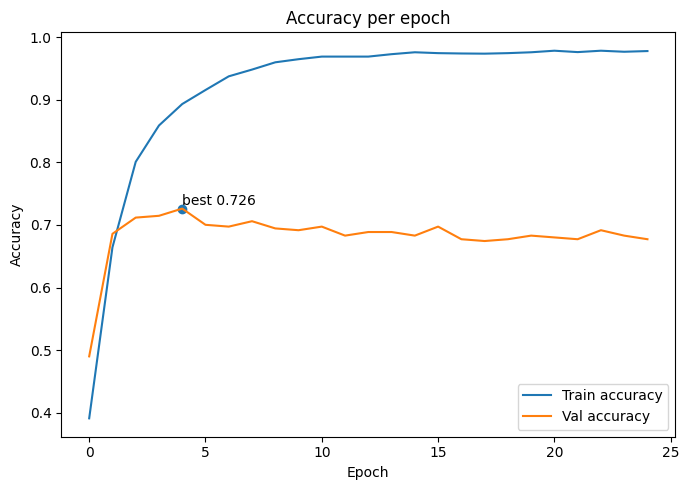

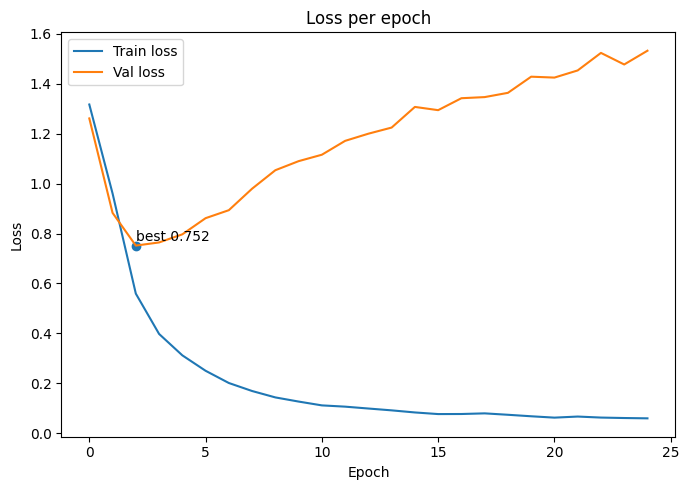

In [ ]:
# Answer here
# Ex6: plot Training/Validation Accuracy & Loss
import pandas as pd
import matplotlib.pyplot as plt

log_path = "./DM2025-Lab2-Exercise/logs/training_log.csv"
training_log = pd.read_csv(log_path)

# 找出最佳驗證指標 (方便閱讀)
best_val_acc_idx  = training_log['val_accuracy'].idxmax()
best_val_loss_idx = training_log['val_loss'].idxmin()

best_val_acc_epoch  = int(training_log.loc[best_val_acc_idx, 'epoch'])
best_val_acc_value  = float(training_log.loc[best_val_acc_idx, 'val_accuracy'])
best_val_loss_epoch = int(training_log.loc[best_val_loss_idx, 'epoch'])
best_val_loss_value = float(training_log.loc[best_val_loss_idx, 'val_loss'])

print(f"Best val_accuracy @ epoch {best_val_acc_epoch}: {best_val_acc_value:.4f}")
print(f"Best val_loss     @ epoch {best_val_loss_epoch}: {best_val_loss_value:.4f}")

# (1) Accuracy plot
plt.figure(figsize=(7,5))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy')
plt.scatter(best_val_acc_epoch, best_val_acc_value, marker='o')
plt.text(best_val_acc_epoch, best_val_acc_value+0.005, f"best {best_val_acc_value:.3f}")
plt.title('Accuracy per epoch')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.tight_layout()
plt.show()

# (2) Loss plot
plt.figure(figsize=(7,5))
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss')
plt.scatter(best_val_loss_epoch, best_val_loss_value, marker='o')
plt.text(best_val_loss_epoch, best_val_loss_value+0.02, f"best {best_val_loss_value:.3f}")
plt.title('Loss per epoch')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.tight_layout()
plt.show()


# **觀察現象**

*   accuracy：訓練集一路上升到 0.98、驗證集則在第 2-3 個 epoch 左右達到高點 0.72，之後繼續持平或微降（~0.66–0.69）。
*   loss：訓練損失持續下降到 0.06、驗證損失則是在前幾個 epoch 先降到谷底（~0.75），之後再逐步上升（>1.5）。

**結論：典型的overfitting**
*   訓練表現持續改善，但驗證表現在早期抵達高峰後變差／或是不再提升，模型慢慢開始記住訓練資料細節與雜訊，導致泛化能力下降。

**課堂連結**

* Underfitting：若兩條曲線都差、並且同步改善中，則代表容量不足或訓練不夠久。

* Overfitting：訓練越練越好，但驗證卻開始惡化 (圖片顯示正是這種情況！)。



---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [ ]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2331,30327,Watch this amazing live.ly broadcast by @iamju...,"[Watch, this, amazing, live.ly, broadcast, by,..."
3063,40236,Gonna be a loooooong year as a Browns fan. Lon...,"[Gon, na, be, a, loooooong, year, as, a, Brown..."
1527,20670,"@Policy_Exchange A plus point, she won't have ...","[@, Policy_Exchange, A, plus, point, ,, she, w..."
2843,40016,We can't even grieve over one black body befor...,"[We, ca, n't, even, grieve, over, one, black, ..."
409,10409,@RoyEnglish roy as fiery,"[@, RoyEnglish, roy, as, fiery]"


In [ ]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Watch', 'this', 'amazing', 'live.ly', 'broadcast', 'by', '@', 'iamjustinburke', '#', 'musically']),
       list(['Gon', 'na', 'be', 'a', 'loooooong', 'year', 'as', 'a', 'Browns', 'fan', '.', 'Longer', 'than', 'normal', 'and', 'that', "'s", '#', 'sad']),
       list(['@', 'Policy_Exchange', 'A', 'plus', 'point', ',', 'she', 'wo', "n't", 'have', 'to', 'queue', 'for', 'the', 'loos', '.', 'Any', 'more', 'plus', 'points', '?', 'Nope', ',', 'ca', "n't", 'think', 'of', 'any', '#', 'sexism'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [ ]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.43172956,  0.270309  , -0.44524392,  0.3655053 , -0.39072797,
       -1.0180715 ,  0.47966808,  1.2334112 , -0.46494016, -0.37509713,
       -0.47985497, -0.5944741 , -0.7911577 , -0.0899413 ,  0.08496046,
       -0.42695516,  0.20689273, -0.5733152 ,  0.16576484, -1.39922   ,
        0.9095593 ,  0.46254158,  0.7415804 , -0.15175565,  0.4273887 ,
        0.08665261, -0.6815495 ,  0.3189712 , -0.5483581 ,  0.4754582 ,
       -0.00217665, -0.22478296,  0.4729406 , -0.46839944, -0.13816409,
        0.7790075 ,  0.53578424, -0.23479758, -0.9654021 , -0.29339778,
       -0.05489313, -0.02030398, -0.2055069 ,  0.1557731 ,  0.6786914 ,
       -0.25410083, -0.68267065,  0.10082065,  0.947459  ,  0.3918095 ,
        0.20395932, -0.46094915,  0.01654   ,  0.30806673, -0.38541204,
       -0.22838521, -0.07852663, -0.4720721 , -0.33732635,  0.08505379,
        0.03860449, -0.11794528,  0.6263898 ,  0.3304273 , -0.40298724,
        0.75203264,  0.32049328,  0.49996084, -1.3669773 ,  0.61

In [ ]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9197383522987366),
 ('Be', 0.9140673279762268),
 ('birthday', 0.9127490520477295),
 ('help', 0.9084080457687378),
 ('surprised', 0.9010459780693054),
 ('dad', 0.9002022743225098),
 ('smile', 0.8998330235481262),
 ('cats', 0.8951419591903687),
 ('free', 0.8941512703895569),
 ('right', 0.8933315277099609)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is huge, this will take some time ...
model_path = f"{google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [ ]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?

現在我們已經有了詞向量，但輸入資料是一串單字（也就是句子）。
我們要如何運用這些「單字」向量來表示句子資料，並用它來訓練模型呢？


In [ ]:
# Answer here
# EX7: sentence embeddings (mean/TF-IDF weighted) + LogisticRegression
import numpy as np, pandas as pd, nltk
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt', quiet=True)

wv = w2v_google_model
EMB_DIM = wv.vector_size

# (1) Mean pooling
def sent_vec_mean(text, tokenizer=nltk.word_tokenize):
    toks = tokenizer(str(text).lower())
    vecs = [wv[t] for t in toks if t in wv]   # gensim 4: `t in wv` OK
    return np.mean(vecs, axis=0).astype(np.float32) if vecs else np.zeros(EMB_DIM, np.float32)

X_train_mean = np.vstack([sent_vec_mean(s) for s in train_df['text']])
X_test_mean  = np.vstack([sent_vec_mean(s) for s in test_df['text']])
y_train, y_test = train_df['emotion'].values, test_df['emotion'].values

clf_mean = LogisticRegression(max_iter=300, n_jobs=-1, multi_class='auto', C=1.0)
clf_mean.fit(X_train_mean, y_train)
print('[Mean] train acc:', round(accuracy_score(y_train, clf_mean.predict(X_train_mean)), 3))
print('[Mean] test  acc:', round(accuracy_score(y_test,  clf_mean.predict(X_test_mean)), 3))
print(classification_report(y_test, clf_mean.predict(X_test_mean), digits=2))

# (2) TF-IDF weighted pooling
tfidf = TfidfVectorizer(lowercase=True, token_pattern=r"(?u)\b\w+\b", min_df=2)
tfidf.fit(train_df['text'].astype(str).values)
idf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))
max_idf = max(idf.values())

def sent_vec_tfidf(text, tokenizer=nltk.word_tokenize):
    toks = tokenizer(str(text).lower())
    v = np.zeros(EMB_DIM, np.float32); wsum = 0.0
    for t in toks:
        if t in wv:
            w = idf.get(t, max_idf)
            v += w * wv[t]; wsum += w
    return (v/wsum) if wsum > 0 else v

X_train_w = np.vstack([sent_vec_tfidf(s) for s in train_df['text']])
X_test_w  = np.vstack([sent_vec_tfidf(s) for s in test_df['text']])

clf_w = LogisticRegression(max_iter=300, n_jobs=-1, multi_class='auto', C=1.0)
clf_w.fit(X_train_w, y_train)
print('[TFIDF-w] train acc:', round(accuracy_score(y_train, clf_w.predict(X_train_w)), 3))
print('[TFIDF-w] test  acc:', round(accuracy_score(y_test,  clf_w.predict(X_test_w)), 3))
print(classification_report(y_test, clf_w.predict(X_test_w), digits=2))



[Mean] train acc: 0.758
[Mean] test  acc: 0.7
              precision    recall  f1-score   support

       anger       0.71      0.62      0.66        84
        fear       0.68      0.82      0.74       110
         joy       0.69      0.75      0.72        79
     sadness       0.75      0.57      0.65        74

    accuracy                           0.70       347
   macro avg       0.71      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

[TFIDF-w] train acc: 0.749
[TFIDF-w] test  acc: 0.669
              precision    recall  f1-score   support

       anger       0.64      0.60      0.62        84
        fear       0.66      0.79      0.72       110
         joy       0.66      0.73      0.69        79
     sadness       0.74      0.50      0.60        74

    accuracy                           0.67       347
   macro avg       0.68      0.66      0.66       347
weighted avg       0.67      0.67      0.66       347



**目標：把一句話 (多個詞向量) 轉成固定長度的向量或可訓練的序列後，就可以餵進分類模型。**

(一) 先「句向量化」、再用一般分類器

把一句話的多個詞向量聚合成一個向量，接 Logistic Regression / SVM / MLP 等方法。

  1. Mean pooling：把該句所有詞向量取平均。

    - 優點：簡單穩定、計算快。
    - 缺點：忽略詞序與關鍵詞權重。

  2. TF-IDF 加權平均：重要詞會先給較大權重再平均
  
    - 優點：較能凸顯關鍵詞
  3. Max / Mean / Min pooling 拼接或 SIF (Smooth Inverse Frequency)

    - 優點：捕捉不同統計特徵、降低高頻詞影響。
    - 缺點：仍不看詞序。

**用途：得到固定維度的句向量後，就能直接訓練傳統的分類器 (EX：LogReg、LinearSVC、RandomForest…)。**

**一句話總結：把每個詞的向量透過聚合 (平均/加權/池化) 得到句向量，或直接把詞向量依序輸入 LSTM/CNN/Transformer，即可順利訓練情緒分類模型。**

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](https://drive.google.com/uc?export=view&id=1YaPsXWrr7sQFHelMyiNuERs2lG1tZZ54)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [ ]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [ ]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://drive.google.com/uc?export=view&id=1loQX4BJI3MlcNmlpjVvqqNTLQSOmxfC4)

In [ ]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [ ]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://drive.google.com/uc?export=view&id=1YgtPqQJysWiWKCOvGVjpA07gwgqap3a6)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://drive.google.com/uc?export=view&id=1NQsoRSWGYAya0dyDefPXYy7l7Ag6a5UT)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

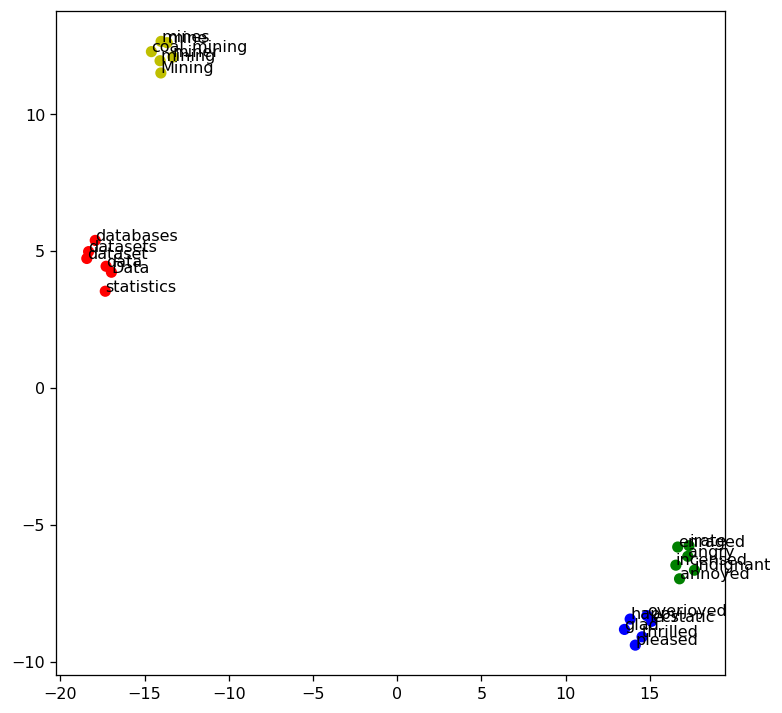

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

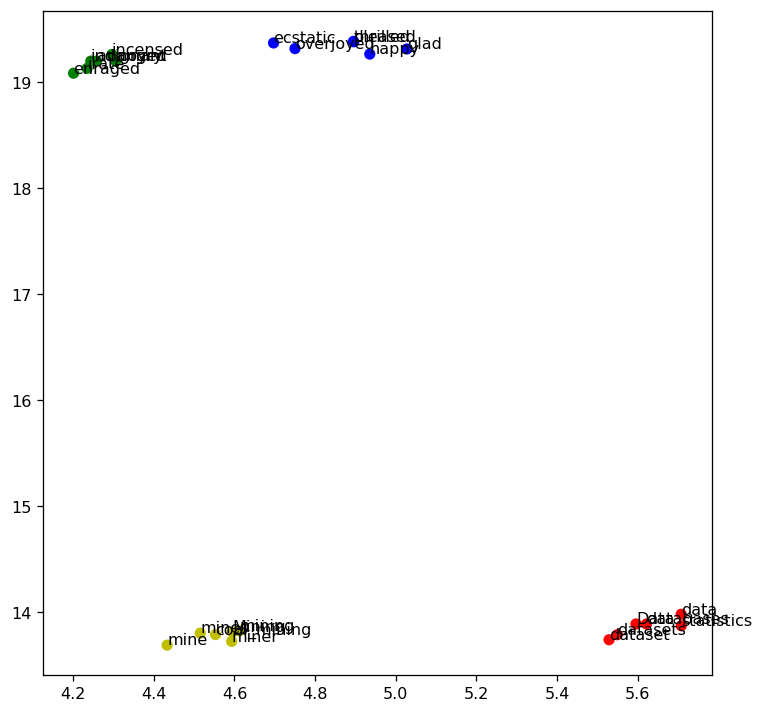

In [ ]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

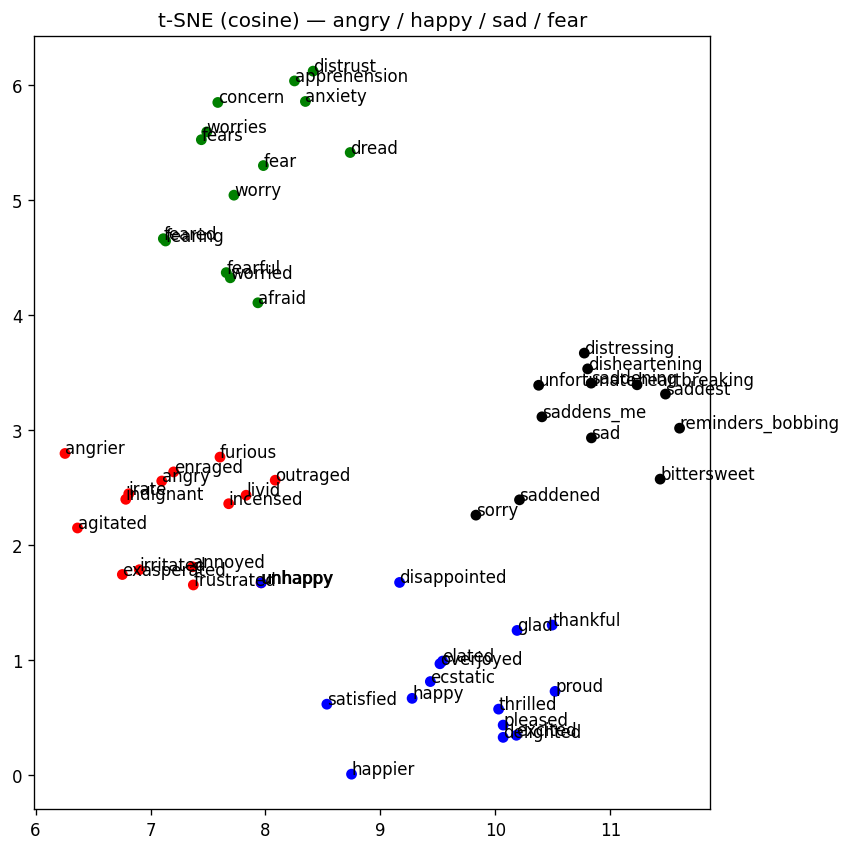

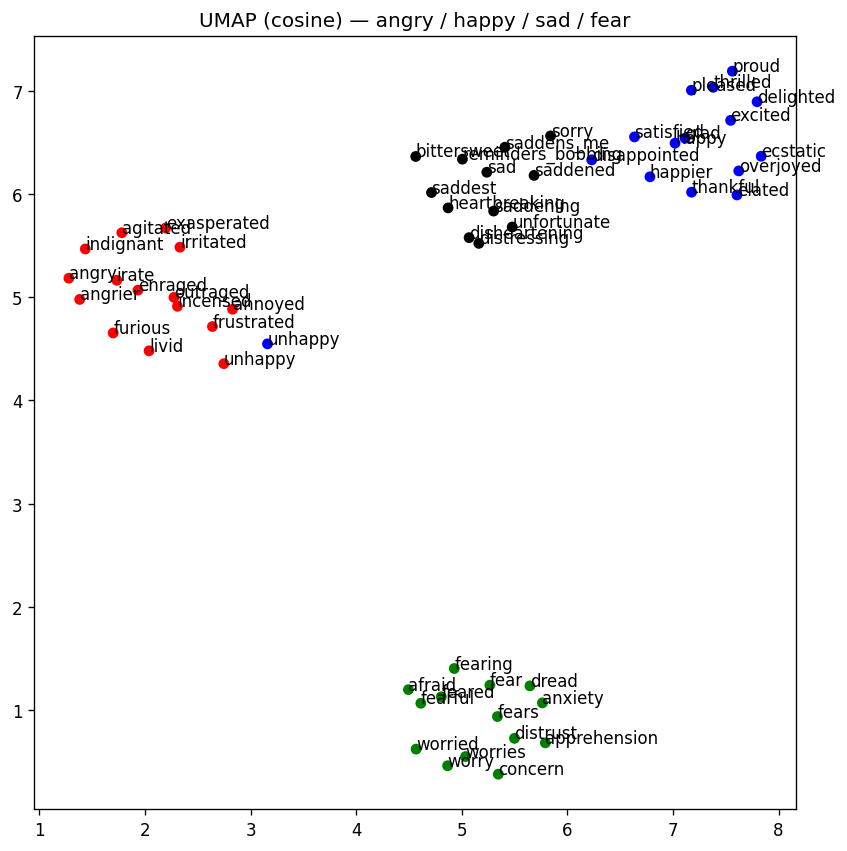

In [ ]:
# Answer here
# Ex8: t-SNE & UMAP for 15 similar words of [angry,happy,sad,fear]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

wv = w2v_google_model

targets = ["angry", "happy", "sad", "fear"]
topn = 15

# 蒐集4組詞
groups = {}
for t in targets:
    words = [t]
    for w, _ in wv.most_similar(t, topn=topn):
        words.append(w.lower())
    words = [w for w in dict.fromkeys(words) if w in wv]
    groups[t] = words[:topn+1]

# 扁平化 + 顏色
labels, colors = [], []
palette = {"angry":"r", "happy":"b", "sad":"k", "fear":"g"}
for t in targets:
    labels.extend(groups[t])
    colors.extend([palette[t]] * len(groups[t]))

# 取向量
X = np.vstack([wv[w] for w in labels])

# ---------- t-SNE ----------
tsne = TSNE(n_components=2, perplexity=30, metric='cosine', init='random', random_state=28)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7.2,7.2), dpi=120)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=colors, s=30)
for (x,y), txt in zip(X_tsne, labels):
    plt.annotate(txt, (x,y), textcoords='offset points', xytext=(0,0))
plt.title("t-SNE (cosine) — angry / happy / sad / fear")
plt.tight_layout(); plt.show()

# ---------- UMAP ----------
import umap.umap_ as umap
um = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1,
               metric='cosine', random_state=28)
X_umap = um.fit_transform(X)

plt.figure(figsize=(7.2,7.2), dpi=120)
plt.scatter(X_umap[:,0], X_umap[:,1], c=colors, s=30)
for (x,y), txt in zip(X_umap, labels):
    plt.annotate(txt, (x,y), textcoords='offset points', xytext=(0,0))
plt.title("UMAP (cosine) — angry / happy / sad / fear")
plt.tight_layout(); plt.show()


# t-SNE
- 結論：t-SNE 較強調局部鄰近關係，讓每一類在局部內「擠得比較緊」，但群與群之間的全局距離則不太穩定
- 觀察到 sad 有一條線伸向 happy，同時 fear 也從縱向貼近 angry 的邊界
# UMAP
- 結論：UMAP 同時保留局部＋**較多全局結構**
- 圖中可以看到四個群組界線較明顯，群體間的關係更容易解讀 (fear 最獨立，happy 與 sad 分界也更清楚)

**可能原因：**

1. UMAP 的 min_dist 越小、n_neighbors 的值偏中小時，群內會更緊密
2. t-SNE 對 perplexity / early_exaggeration / init 很敏感，可能進而導致把群組間的相對位置「擠」得比較不明確

---